In [1]:
# basic data presentation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# label encoder
from sklearn.preprocessing import LabelEncoder

# train-test-split & hyperparameter tuning parameters
from sklearn.model_selection import train_test_split, cross_val_score

# models (ML Algo)
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# evaluation metrics
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report, roc_auc_score

# warnings 
import warnings 
warnings.filterwarnings('ignore')

### Read the DataSet

In [2]:
df_lp = pd.read_csv("Indian Liver Patient Dataset.csv")
df_lp.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# shape of the data
df_lp.shape

(583, 11)

In [4]:
# information about the data set
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   Alkphos   583 non-null    int64  
 5   Sgpt      583 non-null    int64  
 6   Sgot      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   A/G       579 non-null    float64
 10  Selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**There is total 11 features(columns) in the data set.**

In [5]:
# checking total null values
df_lp.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         4
Selector    0
dtype: int64

**A/G** columns having 4 null values, let's see how can we fix it.

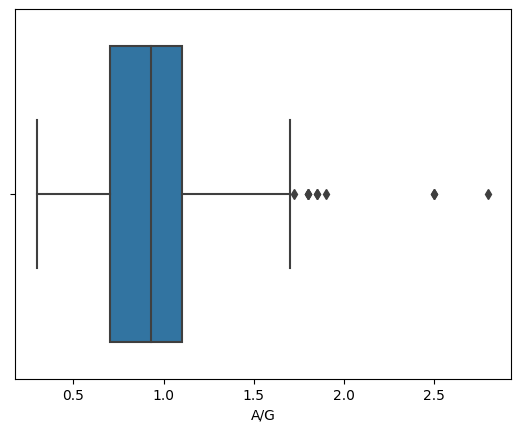

In [6]:
# check the distribution of A/G
sns.boxplot(df_lp['A/G'])
plt.show()

**A/G** columns contain some outliers so, we can replace the missing values with the median.

In [7]:
# replaceing the missing values with median
df_lp['A/G'] = df_lp['A/G'].replace(to_replace = np.NaN, value = df_lp['A/G'].median())
df_lp.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         0
Selector    0
dtype: int64

In [8]:
# data description for numerical col
df_lp.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
# data description for categorical col
df_lp.describe(exclude=[np.number])

,Gender
count,583
unique,2
top,Male
freq,441


**Interpretation:**<br>
    **count** for all col are same that means there is no missing value present in the data set.<br>
    Based on the **Age** column we can see 44 is the average patients age. Followed by maximum age 90 and minimum is 4.<br>
    Maximum Patiens are Male.

For further analysis we need to convert **Gender** column as a numerical column.

In [10]:
# apply label encoder on Gender column
le = LabelEncoder()
df_lp['Gender'] = le.fit_transform(df_lp['Gender'])

#check the dtype of Gender column after applying the label encoder
#print(df_lp['Gender'].dtypes)

#print the data set head
df_lp.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Checking Outliers

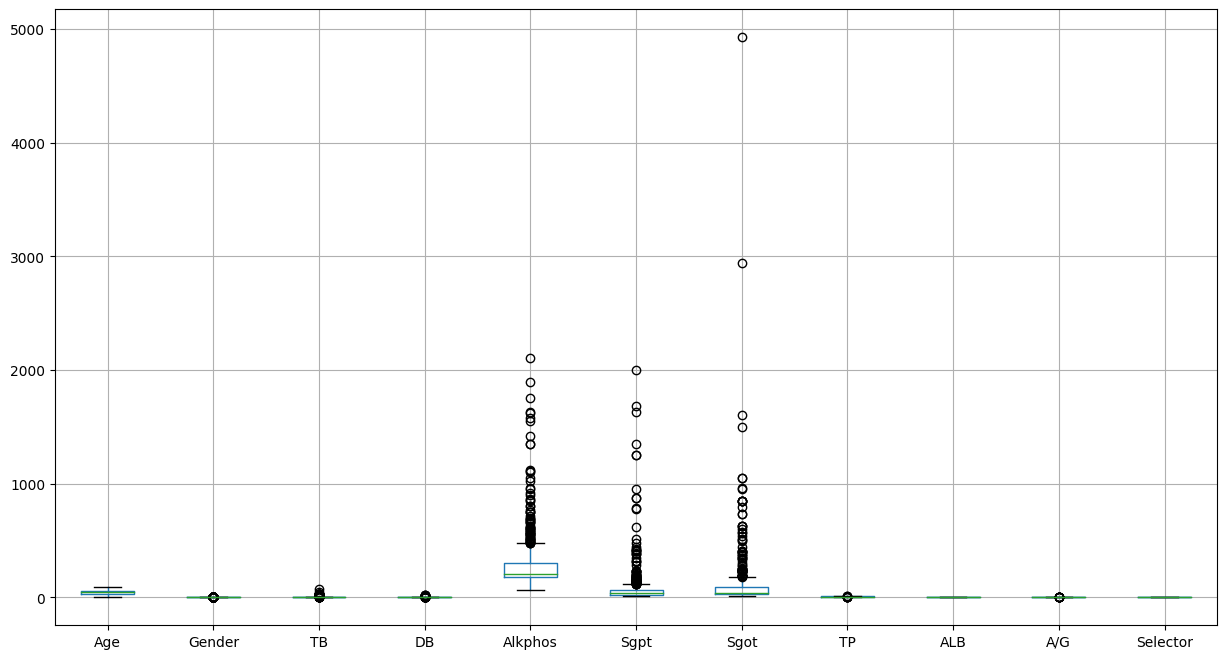

In [11]:
# checking for outliers
plt.figure(figsize =(15, 8))
df_lp.boxplot()
plt.show()

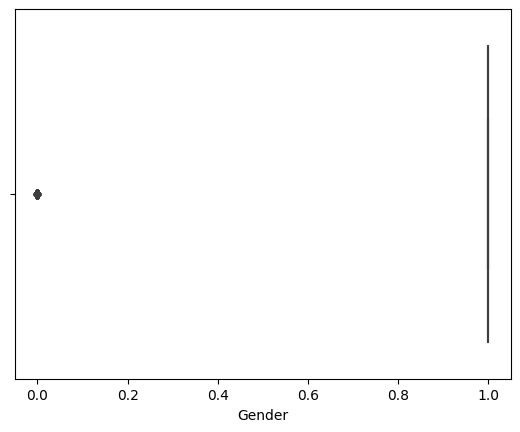

In [12]:
# checking Gender column separately
sns.boxplot(df_lp.Gender)
plt.show()

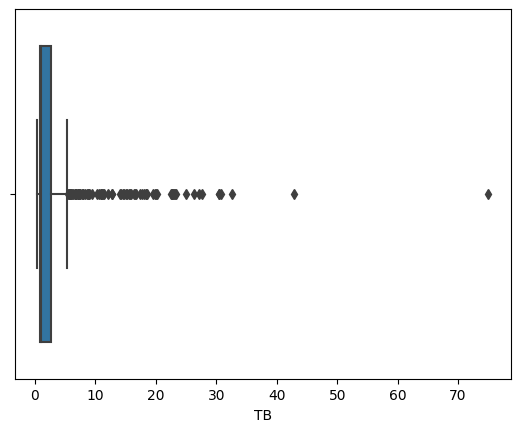

In [13]:
# checking TB column separately
sns.boxplot(df_lp.TB)
plt.show()

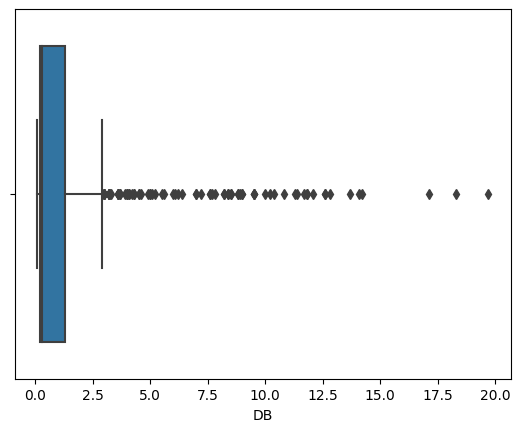

In [14]:
# checking DB column separately
sns.boxplot(df_lp.DB)
plt.show()

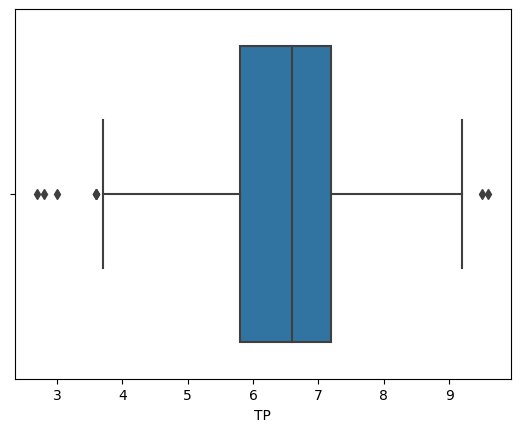

In [15]:
# checking TP column separately
sns.boxplot(df_lp.TP)
plt.show()

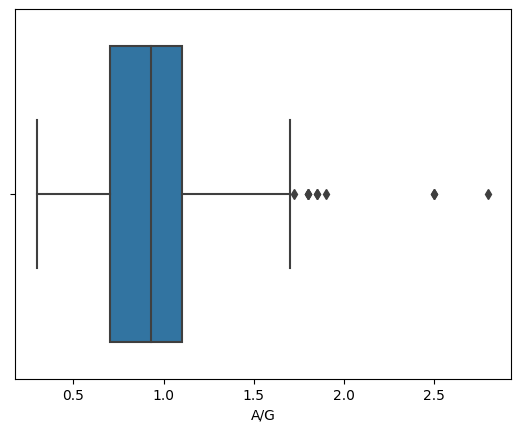

In [16]:
# checking A/G column separately
sns.boxplot(df_lp['A/G'])
plt.show()

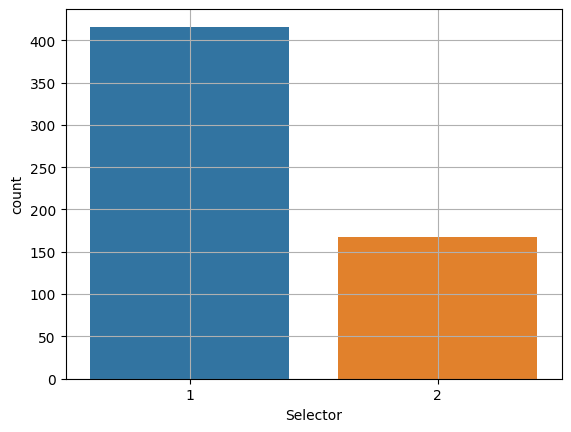

In [17]:
# distribution of target column 
sns.countplot(df_lp['Selector'])
plt.grid(True)
plt.show()

**Interpretation**:<br>
    Most of the column contains outliers and the count of the target column is imbalanced. For further analysis we can't remove this outliers as they are still possible a person indicates he/she has liver problems.

### Correlation Matrix

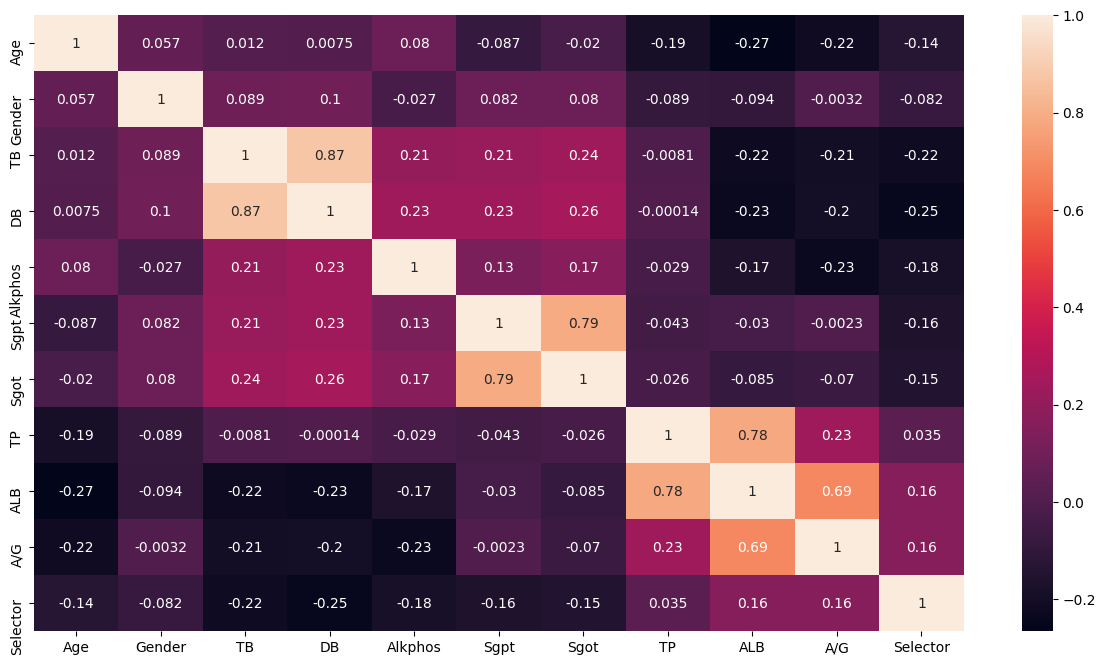

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df_lp.corr(), annot=True)
plt.show()

### Train-Test-Split

In [19]:
# define X and y
X = df_lp.drop('Selector', axis=1)
y = df_lp['Selector']

# split the data into 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# checking the shape of the train and test data 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(408, 10)
(175, 10)
(408,)
(175,)


### Model Buiding

According to the No Free Lunch Theorem (NFLT) of Machine Learning, there is no standard algorithm or no set of rules, that works best in all the datasets. So the best approach is to try multiple Machine Learning Algorithms, if required tune them, and compare them for a specific scenario.

### Stochastic Gradient Descent

Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.33      0.49       128
           2       0.34      0.94      0.50        47

    accuracy                           0.49       175
   macro avg       0.64      0.63      0.49       175
weighted avg       0.77      0.49      0.49       175

Accuracy Score:  0.49142857142857144
ROC AUC Score for test data:  0.6321476063829787
Confusion Matrix: 


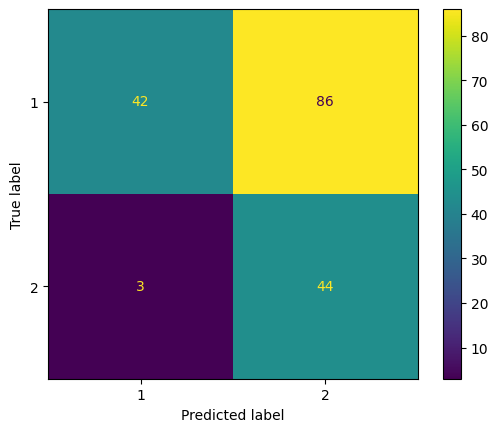

In [20]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_y_predict = sgd.predict(X_test)

print("Classification Report: \n", classification_report(y_test, sgd_y_predict))
print("Accuracy Score: ", accuracy_score(y_test, sgd_y_predict))
print("ROC AUC Score for test data: ", roc_auc_score(y_test, sgd_y_predict))
print("Confusion Matrix: \n", plot_confusion_matrix(sgd, X_test, y_test))
plt.show()  

### Logistic Regression

Classification Report: 
               precision    recall  f1-score   support

           1       0.76      0.92      0.83       128
           2       0.47      0.19      0.27        47

    accuracy                           0.73       175
   macro avg       0.62      0.56      0.55       175
weighted avg       0.68      0.73      0.68       175

Accuracy Score:  0.7257142857142858
ROC AUC Score for test data:  0.5566821808510638
Confusion Matrix: 


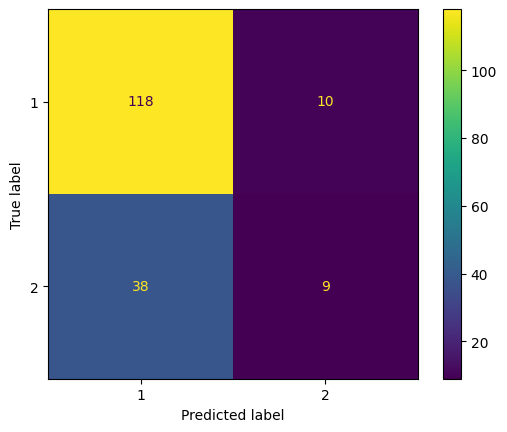

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

print("Classification Report: \n", classification_report(y_test, lr_y_predict))
print("Accuracy Score: ", accuracy_score(y_test, lr_y_predict))
print("ROC AUC Score for test data: ", roc_auc_score(y_test, lr_y_predict))
print("Confusion Matrix: \n", plot_confusion_matrix(lr, X_test, y_test))
plt.show()  

### Naives Bayes

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.42      0.59       128
           2       0.38      0.98      0.55        47

    accuracy                           0.57       175
   macro avg       0.68      0.70      0.57       175
weighted avg       0.82      0.57      0.58       175

Accuracy Score:  0.5714285714285714
ROC AUC Score for test data:  0.7002992021276595
Confusion Matrix: 


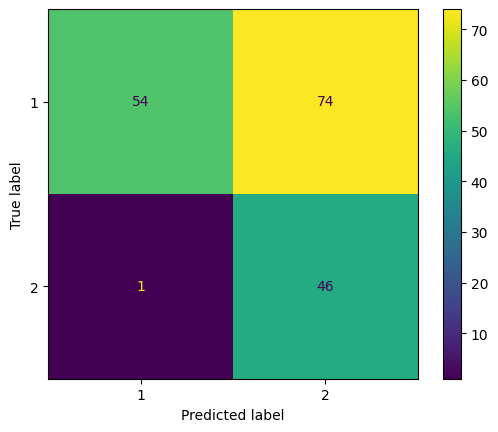

In [22]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_predict = nb.predict(X_test)

print("Classification Report: \n", classification_report(y_test, nb_y_predict))
print("Accuracy Score: ", accuracy_score(y_test, nb_y_predict))
print("ROC AUC Score for test data: ", roc_auc_score(y_test, nb_y_predict))
print("Confusion Matrix: \n", plot_confusion_matrix(nb, X_test, y_test))
plt.show()  

### K-Nearest Neighbours

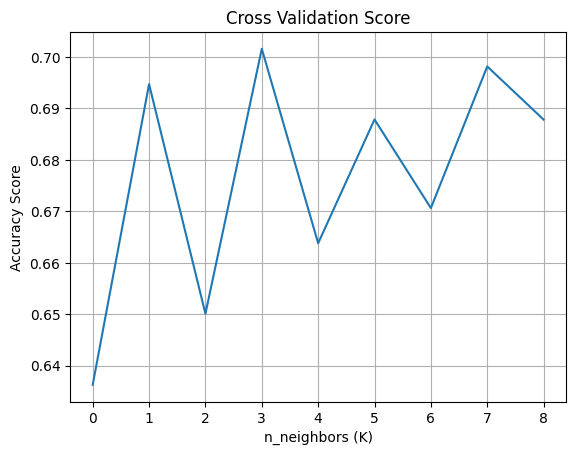

In [23]:
my_list = []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, X, y, cv=5)
    my_list.append(cv_score.mean())
    
plt.plot(my_list)
plt.title("Cross Validation Score")
plt.xlabel("n_neighbors (K)")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.show()

Classification Report: 
               precision    recall  f1-score   support

           1       0.78      0.78      0.78       128
           2       0.39      0.38      0.39        47

    accuracy                           0.67       175
   macro avg       0.58      0.58      0.58       175
weighted avg       0.67      0.67      0.67       175

Accuracy Score:  0.6742857142857143
ROC AUC Score for test data:  0.5821143617021276
Confusion Matrix: 


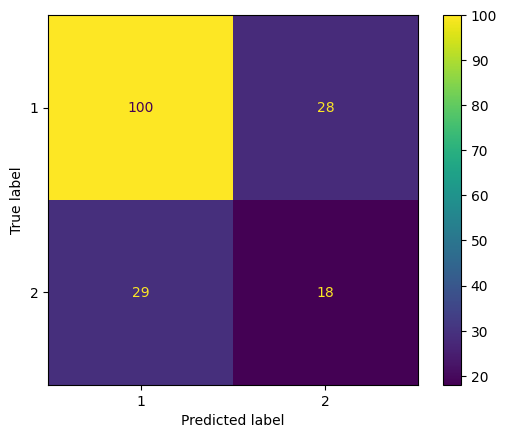

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_y_predict = knn.predict(X_test)

print("Classification Report: \n", classification_report(y_test, knn_y_predict))
print("Accuracy Score: ", accuracy_score(y_test, knn_y_predict))
print("ROC AUC Score for test data: ", roc_auc_score(y_test, knn_y_predict))
print("Confusion Matrix: \n", plot_confusion_matrix(knn, X_test, y_test))
plt.show()  

### Random Forest Classifier

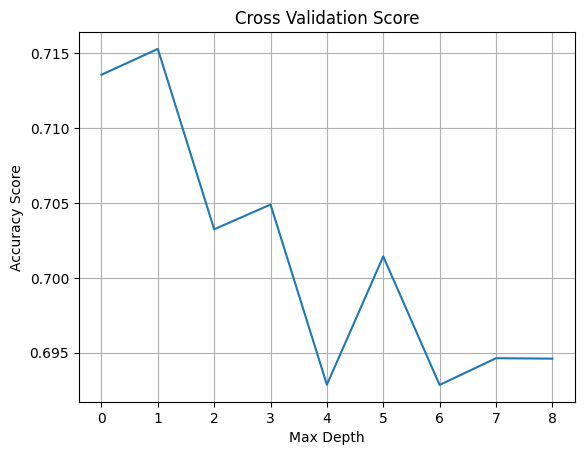

In [25]:
rf_list = []

for i in range(1,10):
    rf = RandomForestClassifier(n_estimators=90, max_depth=i, random_state=42)
    cv_score = cross_val_score(rf, X, y, cv=5)
    rf_list.append(cv_score.mean())
    
plt.plot(rf_list)
plt.title("Cross Validation Score")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.show()

Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.87      0.82       128
           2       0.45      0.30      0.36        47

    accuracy                           0.71       175
   macro avg       0.61      0.58      0.59       175
weighted avg       0.69      0.71      0.69       175

Accuracy Score:  0.7142857142857143
ROC AUC Score for test data:  0.582529920212766
Confusion Matrix: 


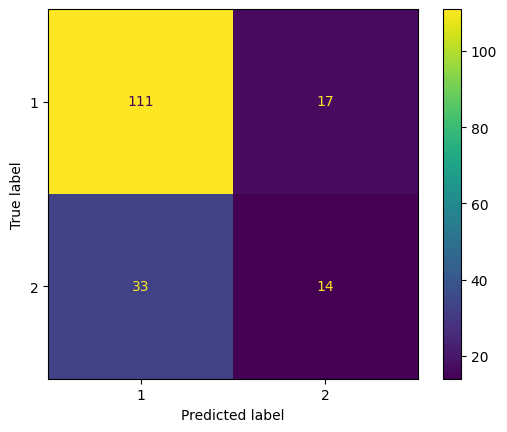

In [26]:
rf = RandomForestClassifier(n_estimators=90, max_depth=7, random_state=42)
rf.fit(X_train, y_train)
rf_y_predict = rf.predict(X_test)

print("Classification Report: \n", classification_report(y_test, rf_y_predict))
print("Accuracy Score: ", accuracy_score(y_test, rf_y_predict))
print("ROC AUC Score for test data: ", roc_auc_score(y_test, rf_y_predict))
print("Confusion Matrix: \n", plot_confusion_matrix(rf, X_test, y_test))
plt.show() 

### Decision Tree Classifier

Classification Report: 
               precision    recall  f1-score   support

           1       0.81      0.76      0.78       128
           2       0.44      0.51      0.47        47

    accuracy                           0.69       175
   macro avg       0.62      0.63      0.63       175
weighted avg       0.71      0.69      0.70       175

Accuracy Score:  0.6914285714285714
ROC AUC Score for test data:  0.6342253989361701
Confusion Matrix: 


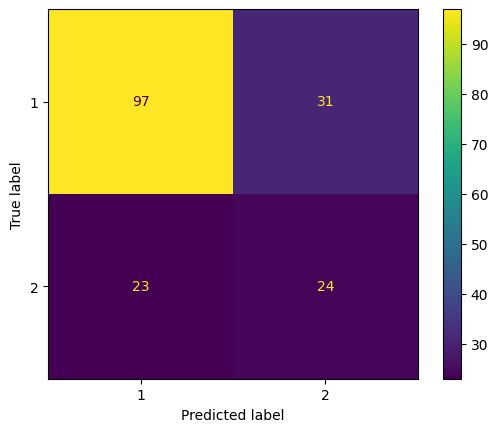

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_predict = dt.predict(X_test)

print("Classification Report: \n", classification_report(y_test, dt_y_predict))
print("Accuracy Score: ", accuracy_score(y_test, dt_y_predict))
print("ROC AUC Score for test data: ", roc_auc_score(y_test, dt_y_predict))
print("Confusion Matrix: \n", plot_confusion_matrix(dt, X_test, y_test))
plt.show() 

### Accuracy Score

In [28]:
print("Accuracy Score for Stochastic Gradient Descent: ", accuracy_score(y_test, sgd_y_predict))
print("Accuracy Score for Logistic Regression: ", accuracy_score(y_test, lr_y_predict))
print("Accuracy Score for Naive Bayes Classifier: ", accuracy_score(y_test, nb_y_predict))
print("Accuracy Score for K Nearest Neighbours: ", accuracy_score(y_test, knn_y_predict))
print("Accuracy Score for Random Forest: ", accuracy_score(y_test, rf_y_predict))
print("Accuracy Score for Decision Tree: ", accuracy_score(y_test, dt_y_predict))

Accuracy Score for Stochastic Gradient Descent:  0.49142857142857144
Accuracy Score for Logistic Regression:  0.7257142857142858
Accuracy Score for Naive Bayes Classifier:  0.5714285714285714
Accuracy Score for K Nearest Neighbours:  0.6742857142857143
Accuracy Score for Random Forest:  0.7142857142857143
Accuracy Score for Decision Tree:  0.6914285714285714


**Interpretation:**<br>
    We got maximum 72.57% accuracy by Logistic Regression.

### Comparison between Actual and Predicted Values

In [29]:
liver_patient_dict = {'Actual':y_test, 'Predicted':lr_y_predict}
lpd = pd.DataFrame.from_dict(liver_patient_dict)
lpd

,Actual,Predicted
355,2,2
407,1,1
90,1,1
402,1,1
268,1,1
...,...,...
108,2,1
264,2,1
582,2,2
464,2,1
